## Bu Notebook'da Neler Var?

Bu noktaya kadar basit bir lineer sistemi Least Squares Method ile nasıl kuracağımızı ve çözmek için kapalı form çözümü veye Gradient Descent'i nasıl kullanabileceğimizi tartıştık. Bu noktada Neural Network'lere girmeden hemen önce ihtiyacımız olacak başka bazı araçlara bakacağız ve yaptığımız optimizasyon işleminin görsel olarak ne anlama geldiğini biraz daha iyi anlamaya çalışacağız.

Bu notebook'da yeri geldiğinde Neural Network'lerden de biraz örnek vermemiz gerekebilir, ama bunları şimdilik kapalı kutu örnekler olarak düşünün, daha sonra tam olarak nasıl çalıştıklarını detaylıca inceleyeceğiz.

Özetlemek gerekirse iki ana odağımız var, convex ve convex olmayan optimizasyon problemleri için (terimleri araştırmak isterseniz [buradan](https://en.wikipedia.org/wiki/Convex_optimization) bakabilirsiniz) hata fonksiyonumuz parametre uzayında neye benziyor, nasıl görünüyor. Daha sonrasında ise yüksek miktarda datayı parça parça işleyebileceğimiz üzerinde duracağız bu da Stochastic Gradient Descent kısmı olacak.

#### Model Eğitmek ve Görselleştirmek için İhtiyacımız Olacak Fonksiyonlar

Bu noktada işlerimizi kolaylaştırmak adına PyTorch kullanmaya geçebiliriz, aslında Neural Network'lerde gradyan hesabını henüz yapmadığımız için biraz erken olacak ama konu oraya gelince otomatik gradyan hesaplama kısmını kapatırız :) Şimdilik NumPy'ın biraz daha gelişmiş versiyonu olarak düşünebiliriz PyTorch'u.

Öncelikle Least Squares Method örneğine PyTorch ile tekrar bakalım:

In [1]:
# Bu noktada PyTorch'u kurmanız gerekiyor, eğer ne yaptığınızı çok bilmiyorsanız kesinlikle Anaconda kullanmanınızı öneririm.
# Öbür türlü CUDA kütüphanelerini vs. kurmak ile bayağı bir uğraşmak gerekiyor, Anaconda ile tek bir komut ile bilgisayarınızın özelliklerine göre kurulum
# yapabilirsiniz

# Anaconda kurmak için: https://docs.anaconda.com/free/anaconda/install/index.html
# PyTorch kurmak için: https://pytorch.org/get-started/locally/ (Doğru seçenekleri seçtiğinize emin olun :) Bilgisayarınızda NVIDIA bir ekran kartı varsa CUDA 11.7 veya 11.8 seçeneklerini kullanabilirsiniz, yoksa CPU seçin.)

import torch
import numpy as np

torch.random.manual_seed(42)
np.random.seed(42)

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
# Yine rastgele bir eğitim datası ve karşılık gelen labelları oluşturalım:

N = 10000 # Toplam veri sayısı
D = 10   # Verilerin vektör uzunluğu

X = torch.randn(N, D, device=device) # Gaussian Distribution'dan rastgele değerlere sahip bir matris oluşturuyoruz

w = torch.randn(D, 1, device=device) # Gaussian Distribution'dan rastgele değerlere sahip bir matris oluşturuyoruz
                                     # bunlar ile X matrisini çarpıp y değerlerini oluşturacağız daha sonra ise bu değerleri
                                     # bilmiyor gibi davranarak X ve y ile w değerlerini bulmaya çalışacağız

# Buradaki mantığın biraz daha temeline girmemiz gerekirse, Machine Learning'de X ve y'yi herhangi bir olay için ölçümler yaparak
# elde ediyoruz, gerçek dünya problemlerinde "w" yani öğrenmeye çalıştığımız parametreler aslında ne olayı birebir temsil etmek için
# yeterli, ne de ona dair pek bir fikrimiz var. Ama problemin yapısına bakarak bir model oluşturuyoruz ve X ile y arasındaki ilişki
# şu şekilde bir modelle iyi kötü çözülür diyoruz, örneğin Least Squares Method'da bu 1 adet matris çarpımıydı ve o matrisin parametrelerini
# bulmaya çalışıyorduk.

# Rastgele ürettiğimiz bu datada elimizde ölçüm olmadığı için tersten gidiyoruz, w'yu biliyor gibi davranarak ondan y değerlerini oluşturuyoruz
# bu sayede X ve y arasında gerçekten de öğrenilebilir bir ilişki olmasını garanti ediyoruz, çünkü ikisini de tamamen random üretseydik aralarında
# öğrenilebilir bir ilişki olmayabilirdi (büyük ihtimalle de olmazdı), sonra tabii ki bizim asıl amacımız w'yu bulmak olduğu için onu bilmiyor gibi
# davranıyoruz ve X ve y arasındaki ilişkiyi bulmaya çalışıyoruz.

y = X @ w + torch.randn(N, 1, device=device) * 0.1 # X matrisini w ile çarpıp y değerlerini oluşturuyoruz
                                                   # üstüne bir miktar daha gürültü eklememizin sebebi ise kusur olan ilişkiyi birazcık bozup kendi
                                                   # işimizi zorlaştırmak :)


In [4]:
# Şimdi geçen haftalarda yaptığımız gibi bu problemi çözmeye çalışalım:

# Kapalı Form Çözüm

w_hat = torch.inverse(X.T @ X) @ X.T @ y # Kapalı form çözümü ile w_hat değerlerini buluyoruz

print("Kapalı form çözümü ile w_hat değerleri:\n", w_hat.reshape(-1))

# Gradient Descent

w_hat = torch.randn(D, 1, device=device) * 0.1 # w_hat değerlerini rastgele başlangıç değerleri ile başlatıyoruz (Gradient descentte değerleri ufak başlatmak çoğu zaman işimize gelir)

lr = 0.01 # Learning rate değerimiz

for t in range(1000): # 1000 epoch boyunca çalışacağız (epoch: tüm verileri bir kere görmek)

    y_hat = X @ w_hat # y_hat değerlerini hesaplıyoruz
    w_hat -= lr * ((2 * X.T @ (y_hat - y)) / N) # Gradient descent ile w_hat değerlerini güncelliyoruz

print("Gradient descent ile w_hat değerleri:\n", w_hat.reshape(-1))
print("w değerleri:\n", w.reshape(-1))

Kapalı form çözümü ile w_hat değerleri:
 tensor([ 0.1382, -0.1091, -0.7171,  0.7569,  0.3713, -1.0056,  0.0086,  0.3277,
         0.2830, -0.8926], device='cuda:0')
Gradient descent ile w_hat değerleri:
 tensor([ 0.1382, -0.1091, -0.7171,  0.7569,  0.3713, -1.0056,  0.0086,  0.3277,
         0.2830, -0.8926], device='cuda:0')
w değerleri:
 tensor([ 0.1391, -0.1082, -0.7174,  0.7566,  0.3715, -1.0049,  0.0083,  0.3277,
         0.2829, -0.8926], device='cuda:0')


Gördüğünüz gibi buraya kadar değişen pek bir şey yok, şimdi bir de şu kendi kendine gradyan alma özelliği neymiş onu görelim, bunun için kendimize aynı problem için çok ufak bir neural network oluşturalım:

In [5]:
class LSMBasic(torch.nn.Module): # Bu Module vesaire işin OOP kısmı, torch.nn.Module'den türettiğimiz class'ın içinde kendi kendine türev almak ve başka bazı işler için hazır yapılar var

    def __init__(self, D): # OOP bilmeyenler için kısaca, bir class'ın içindeki __init__ fonksiyonu o class'ı oluştururken çalışan fonksiyondur, özetle basit bir kurulum işlemi yapar
        # self'in ne olduğu çok önemli değil, class içinde fonksiyon yaratırken başa self yazarız, detayları OOP dersinin konusu :)
        # Sonrasında verdiğimiz her şey bizim kendi isteğimizle, mesela D'yi bir parametre olarak veriyoruz ki öğreneceği matrisin boyutunu bilsin
        super().__init__() # Yine biraz OOP magic, bunu da başka bir class'ı extend ederken kullanıyoruz, 

        # Bu kısım kafanızda büyütmediğinizde çok basit, torch.nn.Linear dümdüz bizim gradient descent'i elimizle yaparken yaptığımız gibi
        # D1'e D2 boyutlu bir matris oluşturur, artık kaçtan kaça gidiyorsak, bizim örneğimizde D'den 1'e gidiyoruz, yani Dx1 boyutlu bir matris oluşacak
        # Neural Network'lerde layer dediğimiz şeyler kod açısında bu tür ufak ufak işlemler

        self.linear = torch.nn.Linear(D, 1, bias=False) # Yukarıdaki w_hat = torch.randn(D, 1, device=device) * 0.1  ile hemen hemen aynı şeyi yapıyor, bias=False dememizin sebebini toplantıda tartışalım :)
        # bir özelliği de bunu kullanırken matris çarpımı yapmayacağız, örneğin X @ w yapmak yerine self.linear(X) yapacağız
        # O içerde aynı işlemi yapıp bize sonucu döndürecek

    def forward(self, X): # PyTorch'da model oluştururken forward fonksiyonu bu modeli dümdüz çağırdığımızda yapılacak işlemi belirler, yani X'i alacak sonra ne yapacak bu model, hepsini buraya yazıyoruz

        # bizim örneğimizde X'i alıp self.linear'a veriyoruz, o da matris çarpımı yapıp sonucu döndürüyor
        out = self.linear(X)

        return out

In [6]:
# Artık bu modeli yaratıp işlerimizi ona yaptırabiliriz:

model = LSMBasic(D).to(device) # Modelimizi yaratıyoruz, .to(device) kısmı da CPU'da mı GPU'da mı çalışacağını belirlemek için

# Şimdi aynı gradient descent işlemini yapalım:

lr = 0.01 # Learning rate değerimiz

for t in range(1000): # 1000 epoch boyunca çalışacağız (epoch: tüm verileri bir kere görmek)

    y_hat = model(X) # y_hat değerlerini hesaplıyoruz (Yukarıdaki ile tamamen aynı şeyi yaptığımızı anlamak için vakit harcamanız normal, iyice oturtursanız devamı daha da rahatlayacak)

    loss = torch.mean((y_hat - y) ** 2) # Loss fonksiyonumuzu hesaplıyoruz, yani y_hat ile y arasındaki farkın karesinin ortalamasını alıyoruz (Yine farklı hiçbir şey yapmıyoruz, yukarda loss hesaplamadık çünkü gradyanı direkt biliyorduk)
    # Gradyanımız hataya göre hesaplanacağı için burada hata hesaplayarak PyTorch'a gradyanı neye göre hesaplaması gerektiğini söylüyoruz

    loss.backward() # İşte kritik kısım bu, bu fonksiyonu çağırdığımız anda PyTorch bizim elde ettiğimiz hatayı kullanarak gradyanı bizler için hesapladı, arkaplanda tutuyor

    with torch.no_grad(): # Bunu şu an elimizle gradient descent yapacağımız için kullanıyoruz, basitçe PyTorch'a diyoruz ki buranın altında yapacağımız işlemler için gradyan hesaplama
                          # Yoksa modeli eğittiğimiz işlem için gradyan hesaplar gradyanın gradyanı gibi garip bir şey olur, bu da PyTorch'ın kafasını karıştırır

        for param in model.parameters(): # model.parameters() bize modelimizdeki tüm parametreleri veriyor, biz de bunları tek tek alıp güncelliyoruz (şimdilik bir tane var o da self.linear içindeki matris, ama ilerde değişecek :) )
            param -= lr * param.grad # Gradient descent ile parametreleri güncelliyoruz (yukarıdaki ile birebir aynı şey)

        model.zero_grad() # Gradientleri sıfırlıyoruz, çünkü bir sonraki epoch'ta tekrar hesaplayacağız, eğer sıfırlamazsak bir önceki epoch'ta hesapladığımız gradyanlar ile birikim olur

print("PyTorch ile w_hat değerleri:\n", model.linear.weight.reshape(-1))


PyTorch ile w_hat değerleri:
 tensor([ 0.1382, -0.1091, -0.7171,  0.7569,  0.3713, -1.0056,  0.0086,  0.3277,
         0.2830, -0.8926], device='cuda:0', grad_fn=<ReshapeAliasBackward0>)


Eveet, farkındayım bir seferde çok fazla terim oldu, ama ilerde göreceksiniz ki bunlar çok standart işlemler, çoğu şeyi sadece PyTorch'un dilinden konuşmak için yapıyoruz, genelde de hep ama hep aynı şeyleri yapıyor olacağız. O yüzden anlamak için kendinizi çok yormanıza gerek yok, yüzeysel bir şekilde NumPy ile yaptığımız ile bunun arasındaki farkları anlamanız yeterli, yoksa super ne yapıyormuş, backward nasıl çalışıyormuş bunları çok düşünmeyin, yine toplantıda bir miktar tartışabiliriz :)

Şimdi bununla kafamızı çok bulandırmadan görselleştirme meselesine biraz girelim. Öncelikle neyi görselleştiriyoruz bunu bir hatırlayalım. Artık hepimizin $X$ nedir $y$ nedir $w$ nedir bunları bildiğini düşünüyorum. Peki LSM'i (Least Squares Method'u) matematiksel olarak tanımlarken ne demiştik? Bir hata fonksiyonumuz var ve modelimizin parametrelerini girdi olarak alıyor, yani:

$ E(w) = \frac{1}{N} \sum_{i=1}^{N} (y_i - w^T x_i)^2 $

Evet şu $\frac{1}{N}$ kısmını sonradan biraz ayak üstü ekledik, tek amacı loss değerimiz çok büyük olmasın da N tane örnek için hataların ortalaması gibi olsun. Çünkü değerin büyümesi matematiksel olarak sorun çıkarmasa da değerler çok büyüdüğünde numerik olarak bilgisayarı biraz bozuyor.

Görselleştirmek istediğimiz şey tam olarak bu $E(w)$ fonksiyonu, çünkü biz aslında gradient descent ile sadece bu fonksiyonu optimize ediyoruz, X ve y değişmiyor. Ama burada bir sıkıntı var, $w$ $D$ boyutlu bir vektör, hatta ilerde birden fazla vektör ve matrisden oluşacak bir yapı. Yani en iyi ihtimalle onlarca parametreden oluşan bir yapıdan bahsediyoruz, 1 parametre için iş kolay, parametreyi x eksenine koy, hatayı y eksenine koy oldu, hadi 2 parametre için de ya 3D plot yapıyoruz ya da 2 boyutta hatayı renk ile göstererek bir şekilde hallediyoruz, ama 10 boyutu tam olarak görselleştirmemiz maalesef mümkün değil.

Bu aslında başlı başına bir araştırma konusu, "How to visualize error surface of neural networks" diye aratırsanız bununla ilgili birçok makale bulabilirsiniz. Biz burada benim hoşuma giden ve açıkçası daha önce yazmayı denemediğim bir method kullanacağız, şöyle bakalım:

In [7]:
import matplotlib.pyplot as plt # Grafik çizmek için matplotlib kütüphanesini kullanıyoruz

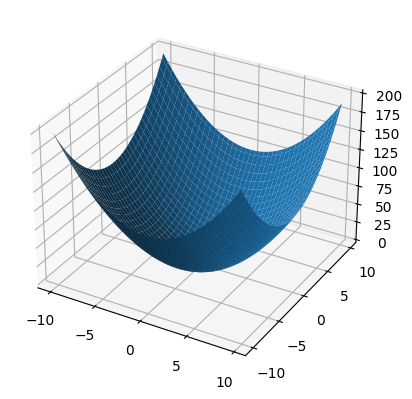

In [8]:
# Plot z = x^2 + y^2
# Bu kısım görselleştirme ile alakalı, meraklı değilseniz kod kısmını okumayabilirsiniz, basitçe z = x^2 + y^2 fonksiyonunu çiziyoruz

fig = plt.figure() # Yeni bir grafik oluşturuyoruz

ax = fig.add_subplot(111, projection='3d') # 3 boyutlu bir grafik oluşturuyoruz

x = np.arange(-10, 10, 0.25) # x değerlerini oluşturuyoruz
y = np.arange(-10, 10, 0.25) # y değerlerini oluşturuyoruz

X, Y = np.meshgrid(x, y) # x ve y değerlerini birleştirip bir grid oluşturuyoruz

Z = X ** 2 + Y ** 2 # z değerlerini hesaplıyoruz

ax.plot_surface(X, Y, Z) # Grafikteki yüzeyi çiziyoruz

plt.show() # Grafikleri gösteriyoruz

Şimdi 3 Boyutlu düşünemediğimizi farz edin, elimizde böyle bir yapı var, sürekli hata yüzeyi derken kastettiğim şey de bu, aslında 2 boyutlu bir yapı ama eğip bükmüşüz gibi, matematikse bu tip yapılara yüzey diyoruz, tabii 10 boyutlu bir uzaydan bahsediyorsak, yüzey dediğimiz şey 9 boyutlu da olabilir :) ama en nihayetinde yaşadığı uzayı doldurmayan ve matematiksel tanımı belli bir yapı (bakınız [manifold](https://en.wikipedia.org/wiki/Manifold)) (Surface diyorduk manifold nereden çıktı diyeceksiniz, şimdilik aynı şey gibi düşünün, detayları başka videonun konusu :) ).

Konumuza dönersek, eğer sadece 2 boyutu anlayan bir canlı olsaydık bu yapıyı görselleştirmek için akıllıca bir çözüme ihtiyacımız olurdu. Bunlardan biri bu yüzey üstünden 2 boyutlu bir kesit almak, örneğin:

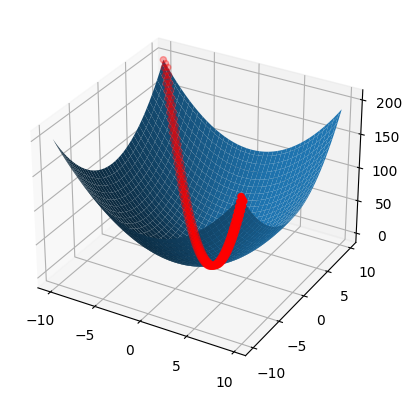

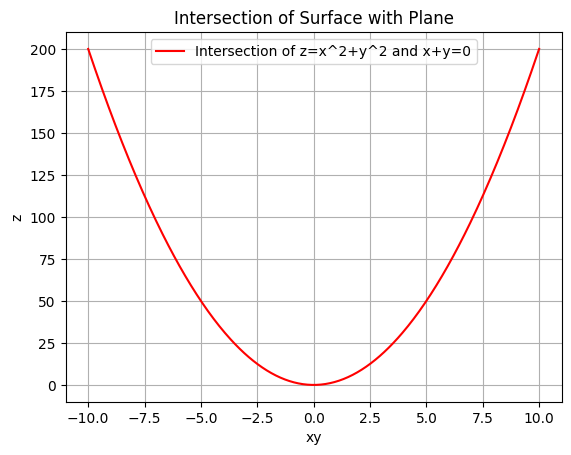

In [9]:
# Plot z = x^2 + y^2
# Bu kısım görselleştirme ile alakalı, meraklı değilseniz kod kısmını okumayabilirsiniz, basitçe z = x^2 + y^2 fonksiyonunu çiziyoruz

fig = plt.figure() # Yeni bir grafik oluşturuyoruz

ax = fig.add_subplot(111, projection='3d') # 3 boyutlu bir grafik oluşturuyoruz

x = np.arange(-10, 10, 0.25) # x değerlerini oluşturuyoruz
y = np.arange(-10, 10, 0.25) # y değerlerini oluşturuyoruz

X, Y = np.meshgrid(x, y) # x ve y değerlerini birleştirip bir grid oluşturuyoruz

Z = X ** 2 + Y ** 2 # z değerlerini hesaplıyoruz

ax.plot_surface(X, Y, Z) # Grafikteki yüzeyi çiziyoruz

# X + Y = 0 düzlemine denk gelen kısmı kırmızı renkte çiziyoruz

mask = np.abs(X + Y) < 0.4 # X + Y = 0 düzlemine denk gelen kısmı seçiyoruz (0.4 degeri tamamen deneme yanılma ile bulundu, direkt 0'a eşit nokta sayısı az diye daha güzel bir görsel elde etmek adına böyle oyunlar yaparız)

ax.scatter3D(X[mask], Y[mask], Z[mask], c='r') # Seçtiğimiz kısmı çiziyoruz

plt.show() # Grafikleri gösteriyoruz

# Şimdi bu kesiti 2 boyutlu bir düzlemde çizelim:

fig = plt.figure()

x_vals = np.linspace(-10, 10, 400)
z_vals = 2 * x_vals**2

plt.plot(x_vals, z_vals, color='red', label='Intersection of z=x^2+y^2 and x+y=0')
plt.xlabel('xy')
plt.ylabel('z')
plt.title('Intersection of Surface with Plane')
plt.legend()
plt.grid(True)
plt.show()


Tabii düzlemi matematiksel olarak tanımlayıp izdüşüm bulmak ile uğraşmak oldukça zahmetli bir iş, o yüzden çok daha kolay bir yöntem var, x ve y için bir başlangıç ve bitiş noktası seçelim, örneğin:

$ start = [-10, -10]$ ve $end = [10, 10] $

Şimdi bu iki noktanın oluşturduğu doğru üstünde $n$ tane nokta seçelim, örneğin $n = 100$ diyelim. Bunun için önce bu iki nokta arasında bir adım vektörü yaratacağız, öyle ki başlangıçtan 100 adım attığımda sona ulaşacağız:

$ step = \frac{end - start}{n} $

Artık x eksenine kaçıncı adımda olduğumuzu ve y eksenine de hata değerimizi yazabiliriz, ve bu yöntem parametrelerimiz kaç boyutlu olursa olsun çalışacak! Şimdi bunu kodlayalım:

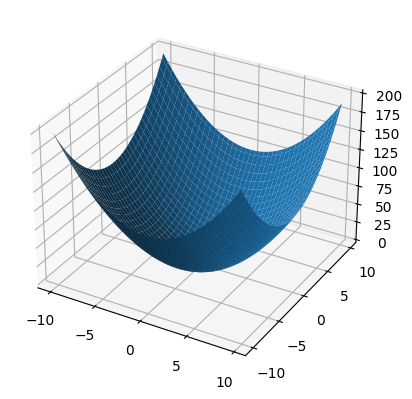

(100, 2)


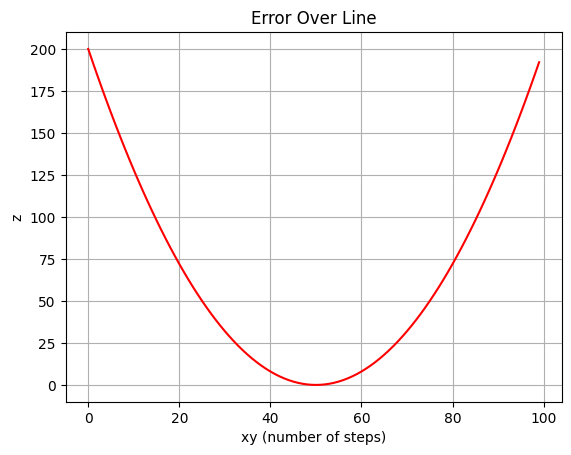

In [10]:
# Plot z = x^2 + y^2
# Bu kısım görselleştirme ile alakalı, meraklı değilseniz kod kısmını okumayabilirsiniz, basitçe z = x^2 + y^2 fonksiyonunu çiziyoruz

fig = plt.figure() # Yeni bir grafik oluşturuyoruz

ax = fig.add_subplot(111, projection='3d') # 3 boyutlu bir grafik oluşturuyoruz

x = np.arange(-10, 10, 0.25) # x değerlerini oluşturuyoruz
y = np.arange(-10, 10, 0.25) # y değerlerini oluşturuyoruz

X, Y = np.meshgrid(x, y) # x ve y değerlerini birleştirip bir grid oluşturuyoruz

Z = X ** 2 + Y ** 2 # z değerlerini hesaplıyoruz

ax.plot_surface(X, Y, Z) # Grafikteki yüzeyi çiziyoruz

plt.show() # Grafikleri gösteriyoruz

plt.figure() # Yeni bir grafik oluşturuyoruz

start = np.array([-10.0, -10.0]) # Başlangıç noktamızı belirliyoruz
end = np.array([10.0, 10.0]) # Bitiş noktamızı belirliyoruz
step = (end - start) / 100 # Başlangıç ve bitiş noktaları arasındaki mesafeyi 100'e bölüp adımımızı belirliyoruz

points = []

for i in range(100): # 100 adım boyunca çalışacağız

    # bu x ve y değerlerine karşılık gelen z değerini hesaplıyoruz
    z = start[0] ** 2 + start[1] ** 2

    points.append((i, z)) # Adım sayımız ve z değerimizi kaydediyoruz

    start += step # Adımımızı ekliyoruz

points = np.array(points) # Numpy array'e çeviriyoruz

print(points.shape) # Numpy array'in boyutunu yazdırıyoruz

# Şimdi bu kesiti 2 boyutlu bir düzlemde çizelim:
plt.plot(points[:, 0], points[:, 1], color='red')
plt.xlabel('xy (number of steps)')
plt.ylabel('z')
plt.title('Error Over Line')
plt.grid(True)
plt.show()

Şimdi bu stratejiyi LSM problemini görselleştirmek için kullanalım:

In [11]:
def generate_random_LSM(N, D):
    X = torch.randn(N, D, device=device)
    w = torch.randn(D, 1, device=device)
    y = X @ w + torch.randn(N, 1, device=device) * 0.1
    return X, y, w


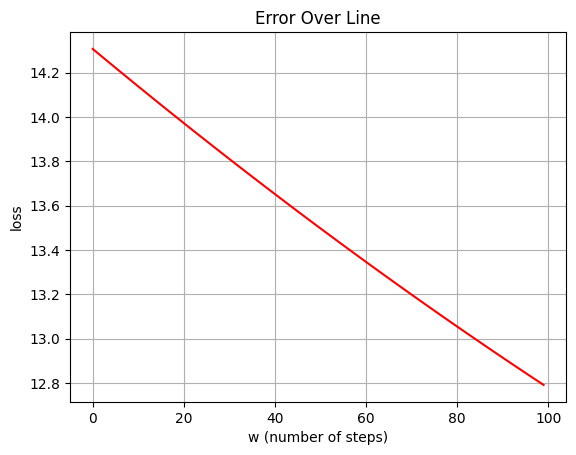

In [12]:
X, y, w = generate_random_LSM(10000, 10)

# İki adet rastgele w belirledik, başlangıçtan bitişe yine aynı mantıkla adım adım yürüyüp hata değerlerini kaydedeceğiz
w_start = torch.randn(10, 1, device=device) * 0.1
w_end = torch.randn(10, 1, device=device) * 0.1

step = (w_end - w_start) / 100

points = []

# Burada PyTorch modelimizi kullanmıyoruz çünkü bizim için işleri kolaylaştırıyor olsa da bir eksisi var
# her şeyi bizim için hallettiği için birçok eleman arka planda ve ulaşması zor, örneğin burada modelin
# içine girip parametreleri elle güncellemek gerekecek ve çok fazla kod karmaşası olacak anlamak için
# buna bakalım sonra bir de direkt PyTorch'a müdahele etmemiz gerekse nasıl olacak ona bakalım

for i in range(100):

    y_hat = X @ w_start
    loss = torch.mean((y_hat - y) ** 2) # torch.mean toplayıp N'e bölmek yerine o işi bizim için yapıyor

    points.append((i, loss.item()))

    w_start += step

points = np.array(points)

plt.plot(points[:, 0], points[:, 1], color='red')
plt.xlabel('w (number of steps)')
plt.ylabel('loss')
plt.title('Error Over Line')
plt.grid(True)
plt.show()

Evet, sonuç olarak çıkan şey bize başta pek bir şey anlatmıyor gibi gözüküyor, bunun sebebi bulmaya çalıştığımız optimum noktasının rastgele iki nokta arasında olmasının çok düşük olasılık olması :)
Eğer güzel bir çanak şekli görmek istiyorsak asıl optimumun üstünden geçen bir doğru seçmemiz lazım, gelin bir de öyle deneyelim:

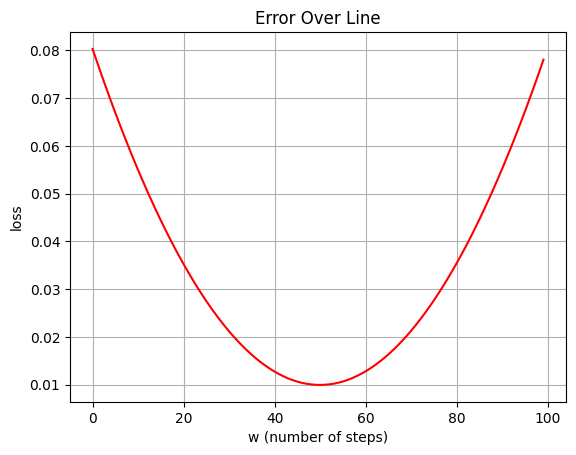

In [13]:
X, y, w = generate_random_LSM(10000, 10)

random_direction_vector = torch.randn(10, 1, device=device) * 0.1 # Rastgele bir yön vektörü oluşturuyoruz (daha sonra bu vektör ile optimumun iki ayrı ucunu başlangıc ve bitiş olarak seçeceğiz)

w_start = w + random_direction_vector # Başlangıç noktamızı belirliyoruz (rastgele bir yönde bir miktar uzaklaştık w'den)
w_end = w - random_direction_vector # Bitiş noktamızı belirliyoruz (bu sefer tam ters yöne gittik)
# Şu an optimum noktamız w_start ve w_end'in ortasında

step = (w_end - w_start) / 100

points = []

# Burada PyTorch modelimizi kullanmıyoruz çünkü bizim için işleri kolaylaştırıyor olsa da bir eksisi var
# her şeyi bizim için hallettiği için birçok eleman arka planda ve ulaşması zor, örneğin burada modelin
# içine girip parametreleri elle güncellemek gerekecek ve çok fazla kod karmaşası olacak anlamak için
# buna bakalım sonra bir de direkt PyTorch'a müdahele etmemiz gerekse nasıl olacak ona bakalım

for i in range(100):

    y_hat = X @ w_start
    loss = torch.mean((y_hat - y) ** 2) # torch.mean toplayıp N'e bölmek yerine o işi bizim için yapıyor

    points.append((i, loss.item()))

    w_start += step

points = np.array(points)

plt.plot(points[:, 0], points[:, 1], color='red')
plt.xlabel('w (number of steps)')
plt.ylabel('loss')
plt.title('Error Over Line')
plt.grid(True)
plt.show()

İşte şimdi güzel bir görsel elde ettik. Ben burada direkt bilmediğimizi kabul ettiğimiz w'yu kullandım ama normalde tabii ki optimal w için eğittiğimiz modelin parametrelerini kullanmamız gerekir. Peki o zaman zaten çözülmemiş bir şeyi görselleştiremiyoruz :D Aslında bu beklenen bir şey, çünkü çözülmemiş bir modeli bu şekilde görselleştirebilseydik çözümün nerede olduğunu görürdük, o zaman zaten bu kadar işi yapmamıza gerek olmazdı, yani görselleştirmeyi problemi çözmek için değil anlamak için yapıyoruz.
Bu arada gördüğünüz gibi size bana güvenin demiştim, hata yüzeyimiz en azından bu açıdan bakınca tam bir çanak şeklinde yani convex, artık diğer yönlerden bakmak için elinizde bir araç var, isterseniz deneyin :) (Rastgele yön vektörünü değiştirerek farklı açılardan izdüşüme bakabilirsiniz.)

Şimdi Stochastic Gradient Descent'ten bahsedelim, burada genel mantığı anlamaya çalışacağız. Momentum, Adam, RMSProp gibi daha gelişmiş yöntemleri ise bir okuma olarak bırakacağım, ama kısaca arkalarındaki motivasyondan bahsederiz.

Tüm mesele elimizdeki veri sayısından çıkıyor, evet $N$ 10000 olduğu zaman datamızı parçalara bölmeye gerek duymuyoruz, ama $N$ 100 milyon olduğu zaman durum değişiyor, artık her bir adımda datamızı parça parça işlememiz gerekiyor, burada ben kendi bilgisayarımı kırmamak için örnek kod koymuyorum ama yukarıdaki örneklerde N'i 100M gibi büyük bir değer yaparak sonuçları görmeyi deneyebilirsiniz :) (Bilgisayar takılır en fazla, bir şey olmaz :D)

Stochastic Gradient Descent'i iyi anlamak için problemimizi biraz değiştireceğiz, şimdi hata fonksiyonumuzu tekrar yazalım:

$ E(w) = \mathbb{E}_{(x, y) \sim P}[ (y - w^T x)^2 ] $

Eveet, istatistik ve olasılıktan tanıdığımız veya tanımıyorsak da şimdi tanıyacağımız $\mathbb{E}$ yani "estimated value". Burada $P$ bir olasılık dağılımı, peki kısaca ve insan diliyle bu ifade ne anlama geliyor açıklayalım:

$x \in \mathbb{R}^D$ ve $y\in \mathbb{R}$ öyle birer ikilidir ki, $P$ olasılık dağılımdan gelirler, burada $P(x, y)$ bize $(x, y)$ ikilisi ile karşılaşma olasılığımızı verir. Aslında bizim şu ana kadar yaptığımız iş, bu hayali dağılımdan $N$ tane örnek çekmekti, yani halihazırda elimizde olmayan bir şeyi az örnek ile tahmin etmeye çalışıyorduk. Şimdi ise farklı bir şey yapmayacağız, sadece elimizdeki örneği de parçalara ayırıp her bir parça için problemimizi ayrı ayrı çözeceğiz. Yani elimizdeki datayı $K$ parçaya bölüp, sanki elimizde $K$ adet problem varmış gibi davranacağız, her problemi çözdüğümüzde de parametrelerimizi güncelleyeceğiz. Tabii bu yüzden her parçamız için hata yüzeyimiz değişecek, çünkü farklı X ve y'ler kullanıyor olacağız, ama varsayımımız şu, tüm bu data zaten aynı dağılımdan geliyorsa, hepsinin hata yüzeyi aşağı yukarı benzer olmalı, o yüzden bu işi yapabiliyoruz. Üstüne üstlük her bir parçadaki ufak tefek farklılıklar da olur da local bir optimuma takılırsak bir sonraki parçada oradan kurtulmamızı sağlayacak! (Bununla ilgili birçok soru işareti oluşmuş olabilir bunun için iki şey yapalım: 1. https://en.wikipedia.org/wiki/Monte_Carlo_method buraya bakın. Aslında her adımda bu kusursuz ve ulaşamadığımız dağılımdan gelecek gradyanın Monte Carlo tahminini yapmaya çalışıyoruz. 2. Bu konuyu toplantıda tartışalım :) )

Ama şimdilik bu kadar açıklamanın kafanıza yattığını düşünüyorum, gelin deneyelim:

In [19]:
# Öncelikle bir batch size belirlememiz gerekiyor, bu verimizi kaçlık parçalara böleceğimizi belirliyor

batch_size = 1000 # Tam sayı olsun ki işimiz kolay olsun :)
model = LSMBasic(D).to(device) # Modelimizi yaratıyoruz
lr = 0.001 # Learning rate değerimiz

# Şimdi verimizi batch_size'lık parçalara bölelim bunu yapmadan önce veriyi şöyle bir karıştırmak her zaman iyi bir fikirdir
# Burada birtakım numaralar yapmamız gerekiyor, hem NumPy hem PyTorch'da şunu yapabiliyoruz:

for i in range(1000): # 1000 epoch yapacağız :) Şimdi neden buna epoch diye ayrı bir isim verildiğini anlayacaksınız, her batch bir iteration, tüm batchleri bir kere gezmek de bir epoch
    perm = torch.randperm(10000) # 0'dan 10000'e kadar rastgele sayılar oluşturuyoruz (Sonra X'imizin 0'dan 10000'e kadar olan satırlarını yeni satırlara tayin edeceğiz, bu sayede sıraları karışacak)
    X = X[perm, :] # X'in iki ekseni var biri N için biri D için, N için olana 0 dan 10000'a yeni sıralar verdik, D için olana : diyerek bunu olduğu gibi bırak dedik
                # Bunlar genel olarak Python'da matematik işlemlerinde kullandığımız bazı kısaltmalar, mesela X[:, 0] dersek X'in tüm satırlarını alıp 0. sütununu alırız gibi gibi
                # Buna ayrıca çalışmak isterseniz NumPy vectorization ve broadcasting diye aratırsanız bulabilirsiniz

    y = y[perm, :] # y için de aynı şeyi yapıyoruz

    # Şimdi veriyi parçalara bölelim
    batches = []
    for j in range(0, N, batch_size):
        batches.append((X[j:j + batch_size, :], y[j:j + batch_size, :])) # X ve y'yi batch_size'lık parçalara bölüyoruz ve batches listesine ekliyoruz

    # Şimdi batches listesindeki her bir elemanı alıp onunla işlem yapacağız
    for batch in batches:
        X_batch, y_batch = batch

        y_hat = model(X_batch)

        loss = torch.mean((y_hat - y_batch) ** 2)

        loss.backward()

        with torch.no_grad():
            for param in model.parameters():
                param -= lr * param.grad

            model.zero_grad()

        # Tamamen aynı şeyi yaptık, sadece veriyi parçalara böldük ve her bir parçayı ayrı ayrı işledik

    if (i + 1) % 100 == 0: # Her 100 epoch'ta bir loss değerimizi yazdırıyoruz
        print("Epoch:", i + 1, "Loss:", loss.item())


# Sonunda da bulduğumuz w_hat değerlerini yazdırıyoruz
print("PyTorch ile w_hat değerleri:\n", model.linear.weight.reshape(-1))
print("w değerleri:\n", w.reshape(-1))



Epoch: 100 Loss: 0.3473987281322479
Epoch: 200 Loss: 0.01754714362323284
Epoch: 300 Loss: 0.010323189198970795
Epoch: 400 Loss: 0.009679113514721394
Epoch: 500 Loss: 0.009907384403049946
Epoch: 600 Loss: 0.010410988703370094
Epoch: 700 Loss: 0.010011966340243816
Epoch: 800 Loss: 0.010262838564813137
Epoch: 900 Loss: 0.00918517541140318
Epoch: 1000 Loss: 0.010321092791855335
PyTorch ile w_hat değerleri:
 tensor([ 0.1468,  0.3991,  0.6860, -1.5540, -2.8205, -0.4933, -0.0832, -0.4254,
         1.9767,  0.8212], device='cuda:0', grad_fn=<ReshapeAliasBackward0>)
w değerleri:
 tensor([ 0.1457,  0.4009,  0.6854, -1.5534, -2.8213, -0.4922, -0.0837, -0.4237,
         1.9765,  0.8197], device='cuda:0')


Gördüğünüz gibi çok iyi çalışıyor :) Şimdi aynı şeyi gerçekten de tek seferde hesaplayamayacağımız kadar büyük bir verisetinde deneyelim:

In [35]:
N = 1000000
D = 10

X, y, w = generate_random_LSM(N, D)

# Öncelikle bir batch size belirlememiz gerekiyor, bu verimizi kaçlık parçalara böleceğimizi belirliyor
batch_size = 10000 # Tam sayı olsun ki işimiz kolay olsun :)
model = LSMBasic(D).to(device) # Modelimizi yaratıyoruz
lr = 0.001 # Learning rate değerimiz

# Şimdi verimizi batch_size'lık parçalara bölelim bunu yapmadan önce veriyi şöyle bir karıştırmak her zaman iyi bir fikirdir
# Burada birtakım numaralar yapmamız gerekiyor, hem NumPy hem PyTorch'da şunu yapabiliyoruz:

for i in range(500): # Şimdi neden buna epoch diye ayrı bir isim verildiğini anlayacaksınız, her batch bir iteration, tüm batchleri bir kere gezmek de bir epoch
    perm = torch.randperm(N) # 0'dan 10000'e kadar rastgele sayılar oluşturuyoruz (Sonra X'imizin 0'dan 10000'e kadar olan satırlarını yeni satırlara tayin edeceğiz, bu sayede sıraları karışacak)
    X = X[perm, :] # X'in iki ekseni var biri N için biri D için, N için olana 0 dan 10000'a yeni sıralar verdik, D için olana : diyerek bunu olduğu gibi bırak dedik
                # Bunlar genel olarak Python'da matematik işlemlerinde kullandığımız bazı kısaltmalar, mesela X[:, 0] dersek X'in tüm satırlarını alıp 0. sütununu alırız gibi gibi
                # Buna ayrıca çalışmak isterseniz NumPy vectorization ve broadcasting diye aratırsanız bulabilirsiniz

    y = y[perm, :] # y için de aynı şeyi yapıyoruz

    # Şimdi veriyi parçalara bölelim
    batches = []
    for j in range(0, N, batch_size):
        batches.append((X[j:j + batch_size, :], y[j:j + batch_size, :])) # X ve y'yi batch_size'lık parçalara bölüyoruz ve batches listesine ekliyoruz

    # Şimdi batches listesindeki her bir elemanı alıp onunla işlem yapacağız
    for batch in batches:
        X_batch, y_batch = batch

        y_hat = model(X_batch)

        loss = torch.mean((y_hat - y_batch) ** 2)

        loss.backward()

        with torch.no_grad():
            for param in model.parameters():
                param -= lr * param.grad

            model.zero_grad()

        # Tamamen aynı şeyi yaptık, sadece veriyi parçalara böldük ve her bir parçayı ayrı ayrı işledik

    if (i + 1) % 100 == 0: # Her 100 epoch'ta bir loss değerimizi yazdırıyoruz
        print("Epoch:", i + 1, "Loss:", loss.item())


# Sonunda da bulduğumuz w_hat değerlerini yazdırıyoruz
print("PyTorch ile w_hat değerleri:\n", model.linear.weight.reshape(-1))
print("w değerleri:\n", w.reshape(-1))



Epoch: 100 Loss: 0.010168318636715412
Epoch: 200 Loss: 0.010187175124883652
Epoch: 300 Loss: 0.009852338582277298
Epoch: 400 Loss: 0.010179410688579082
Epoch: 500 Loss: 0.009991945698857307
PyTorch ile w_hat değerleri:
 tensor([ 0.4181, -0.4916,  2.0670, -0.3030,  0.7632, -0.1037, -0.1886, -0.5107,
        -0.0391,  0.1361], device='cuda:0', grad_fn=<ReshapeAliasBackward0>)
w değerleri:
 tensor([ 0.4181, -0.4917,  2.0669, -0.3029,  0.7631, -0.1036, -0.1885, -0.5106,
        -0.0392,  0.1361], device='cuda:0')


Sorun yaşadıysanız N değerinden 1 adet 0 silmek işe yarayabilir, yine burada göstermelik olarak aslında tüm veriyi tek seferde RAM'e yüklüyoruz ürettiğimiz anda, ama gerçek hayatta bu veri çok daha büyük olacak ve hard disk'te olacak, o yüzden parçalara bölmeden tüm veriyi de yüklemeyeceğiz, hard disk'ten de parça parça okuyarak her türlü hafıza probleminin önüne geçeceğiz :)

Farklı gradient descent yöntemleri için bir kaynak:

https://www.ruder.io/optimizing-gradient-descent/

Şu aşamada her şeyi tam olarak anlamanıza gerek olmayabilir, aslında bu konuya detaylı girmeme sebebimiz de biraz bu, biraz daha giriş seviyesinde tutmak. En nihayetinde bunların her biri, istatistiksel olarak gradient descent'in saçma yerlere sapmaması veya olabildiğince hızlı bir şekilde optimuma ulaşması için yapılmış değişiklikler. Belki ilerde biraz daha detaylı bir şekilde bakarız.

Şimdi iki olayı birleştirip gerçekten de her bir batch için oluşturduğumuz hata yüzeyleri benziyor mu bakalım:

tensor([[ 0.4181, -0.4916,  2.0670, -0.3030,  0.7632, -0.1037, -0.1886, -0.5107,
         -0.0391,  0.1361]], device='cuda:0')
Modelin içinde w'nun şekli: torch.Size([1, 10])


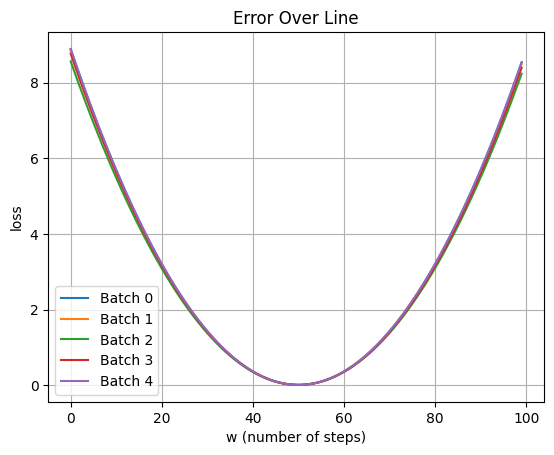

In [40]:
#  Şimdi aynı veri setimizi alalım, yine batchlere bölelim ama bu sefer batchleri görselleştirme algoritmamıza verelim

# Optimal w'yu bulmuştuk, gelin yine başlangıç ve bitiş noktalarını belirleyelim

model_w = model.linear.weight.clone().detach() # Modelin içindeki w değerlerini kopyalıyoruz (orijinalini yanlışlıkla değiştirmemek için)
print(model_w)

print(f"Modelin içinde w'nun şekli: {model_w.shape}")

# Bu sefer birazcık şımarıp söz verdiğim gibi her şeyi modelin içindeki parametreleri kullanarak yapacağız
# Dikkatinizi çekmesi gereken nokta PyTorch matrisi 10x1 olarak değil 1x10 olarak tutmuş, bunun özel bir sebebi yok
# en nihayetinde aynı işlemi yapıyor olacak, sonuçta X @ w ile w.T @ X.T aynı şey (çünkü sonuç skalar)
# Yani bu shapelerin tek başına bir önemi yok, her şey problemi nasıl tasarladığımıza bağlı :)

random_direction_vector = torch.randn(1, 10, device=device) # Rastgele bir yön vektörü oluşturuyoruz (daha sonra bu vektör ile optimumun iki ayrı ucunu başlangıc ve bitiş olarak seçeceğiz)

w_start = model_w + random_direction_vector # Başlangıç noktamızı belirliyoruz (rastgele bir yönde bir miktar uzaklaştık w'den)
w_end = model_w - random_direction_vector # Bitiş noktamızı belirliyoruz (bu sefer tam ters yöne gittik)

# Şu an optimum noktamız w_start ve w_end'in ortasında

step = (w_end - w_start) / 100

# Şimdi verimizi yine batchlere bölelim

batch_size = 10000
batches = []

# X'i bu sefer karıştırmıyorum, yeterince karıştırdık :) Ama eğitim yapacak olsam karıştırırdım
for j in range(0, N, batch_size):
    batches.append((X[j:j + batch_size, :], y[j:j + batch_size, :]))

# İlk 5 batch için görselleştirme yapacağız

points = []

for batch_idx in range(5):

    X_batch, y_batch = batches[batch_idx]

    points.append([]) # Her batch için bir liste oluşturuyoruz

    for i in range(100):

        # Modelin içindeki parametreleri güncelliyoruz
        model.linear.weight = torch.nn.Parameter(w_start + step * i)

        # Güncellenmiş modelin sonuçları
        y_hat = model(X_batch)

        # Loss fonksiyonumuz
        loss = torch.mean((y_hat - y_batch) ** 2)

        # Hafızaya kaydediyoruz
        points[batch_idx].append((i, loss.item()))

points = np.array(points)

# Modeli de eski haline getiriyoruz
model.linear.weight = torch.nn.Parameter(model_w)

# Şimdi de her bir batch'in grafiğini üst üste çizdirelim
for batch_idx in range(5):
    plt.plot(points[batch_idx, :, 0], points[batch_idx, :, 1], label=f"Batch {batch_idx}")

plt.xlabel('w (number of steps)')
plt.ylabel('loss')
plt.title('Error Over Line')
plt.legend()
plt.grid(True)
plt.show()



Gördüğünüz gibi uçlara doğru farklılık gösterse de optimum noktaları neredeyse tamamen üst üste geliyor :) Buradan sonra bir de ufak bir Neural Network hata yüzeyi görselleştirmesi kısmı gelecek onu da pek yakında ekleyeceğim :) İyi çalışmalar.